In [1]:
import os
import sys
import pymc as pm
import arviz as az
sys.path.append('..')

#autoreload
%load_ext autoreload
%autoreload 2

from src.election_model import *


In [2]:
model = ElectionsModel('2024-03-10')
#pm.model_to_graphviz(model.build_model())

FileNotFoundError: [Errno 2] No such file or directory: 'data/marktest_polls.csv'

In [3]:
prior = arviz.from_netcdf("../prior_simplified.nc")
trace = arviz.from_netcdf("../trace_simplified.nc")
posterior = arviz.from_netcdf("../posterior_simplified.nc")



R-hat values:
concentration_polls: 0.9998554200752138
concentration_results: 0.999875365097207
election_party_baseline: [[1.00261057 1.00183368 1.00216836 1.00357342 1.00363673 1.00249774
  1.00129638 1.00188184]
 [1.00204996 1.00178079 1.00417946 1.00292559 1.0022312  1.00117383
  1.00142657 1.00103551]
 [1.0010506  1.00214004 1.00312484 1.00270172 1.0042145  1.00075819
  1.00053615 1.00137368]
 [1.00016001 1.00269754 1.00095647 1.00081046 1.00054878 1.00153754
  1.00155271 1.00194729]
 [1.00092429 1.0039812  1.00267899 1.00135546 1.00637815 1.00078175
  1.00213552 1.00016283]]
election_party_baseline_sd: 1.0110178599143926
election_party_time_effect: [[[1.00099974 1.00016132 1.000306   1.00023848 1.00066518]
  [1.00048425 1.00036103 1.0002087  1.00288951 1.00037137]
  [1.00027529 1.0017205  1.00093125 1.00201667 1.00218353]
  ...
  [1.00037577 1.00070318 1.00172097 1.00138825 1.00119591]
  [1.00090695 1.00001039 1.00164294 1.00280188 1.0001787 ]
  [1.00093772 1.0002384  1.00088238 1.

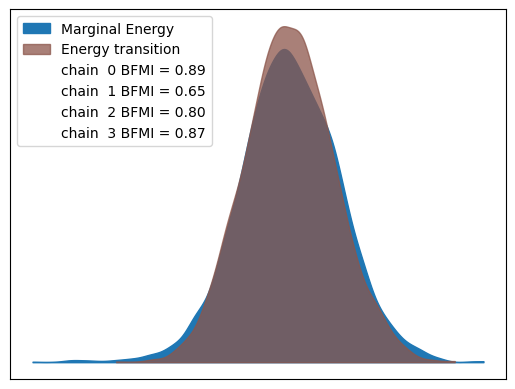


Detailed ESS for each variable:

concentration_polls:
9388.814838792247

concentration_results:
9005.491471685908

election_party_baseline:
[[4076.66829519 4565.99121813 4125.08976426 4176.23549935 3222.80165814
  4938.4898281  6004.9611318  2990.67375233]
 [3049.94926059 6098.01590241 5582.8246406  2805.75004671 1803.66102232
  4551.71745402 6057.19743907 4853.14485541]
 [2943.37545785 3374.11915954 3228.76061963 2125.91897146 1591.27873508
  3940.01656042 5131.01264855 4149.70315338]
 [3009.17237664 3492.5518504  3027.86803292 3681.83810417 3469.31533402
  3186.28289047 2797.95613049 4094.57733698]
 [4036.67960809 1691.36929698 1925.16574159 2522.42366771  898.59318077
  2955.27329664 2302.61261771 5297.82800362]]

election_party_baseline_sd:
492.65591716792903

election_party_time_effect:
[[[ 2655.39980716  3820.38174267  4096.15346812  5183.41556368
    3986.24237322]
  [ 5727.29718994  9089.734701    3774.25410566  3066.58600703
    5516.22606944]
  [ 8090.89082403  9996.23026167

In [4]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Ensure trace is an InferenceData object
if not isinstance(trace, az.InferenceData):
    trace = az.convert_to_inference_data(trace)

# Calculate and print R-hat values
r_hat = az.rhat(trace)
print("R-hat values:")
for var, value in r_hat.items():
    print(f"{var}: {value.values}")

# Calculate and print effective sample sizes
ess = az.ess(trace)
print("\nEffective sample sizes:")
for var, value in ess.items():
    print(f"{var}: {np.min(value.values)}")

# Plot energy distribution
az.plot_energy(trace)
plt.show()

# Print detailed ESS for each variable
print("\nDetailed ESS for each variable:")
np.set_printoptions(threshold=np.inf)
for var_name in ess.data_vars:
    print(f"\n{var_name}:")
    print(ess[var_name].values)

In [6]:
import matplotlib.pyplot as plt
import arviz as az

# Increase the maximum number of subplots
plt.rcParams['figure.max_open_warning'] = 0  # Suppress specific Open warnings
plt.rcParams['figure.max_subplots'] = 100   # Set to a higher number as needed

az.plot_pair(trace, var_names=["lsd_election_party_sd", "election_party_baseline_sd", "lsd_election_party_effect"], kind='scatter', marginals=True)

KeyError: 'figure.max_subplots is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

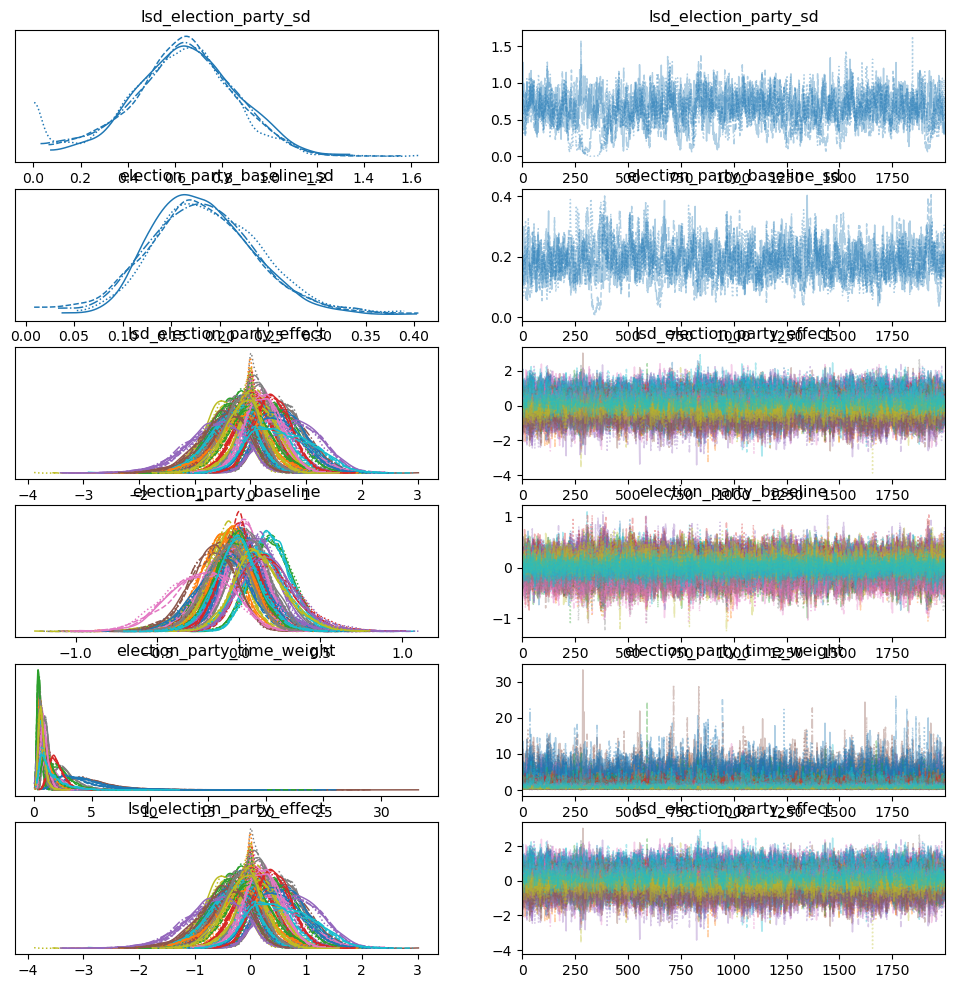

In [7]:
problematic_vars = [
    "lsd_election_party_sd",
    "election_party_baseline_sd",
    "lsd_election_party_effect",
    "election_party_baseline",
    "election_party_time_weight",
    "lsd_election_party_effect",
    # Add any other variables of interest
]

az.plot_trace(trace, var_names=problematic_vars)
plt.show()

/Users/bernardo.caldas/miniforge3/envs/bayes3/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (648) in plot_autocorr, generating only 40 plots
  warnings.warn(


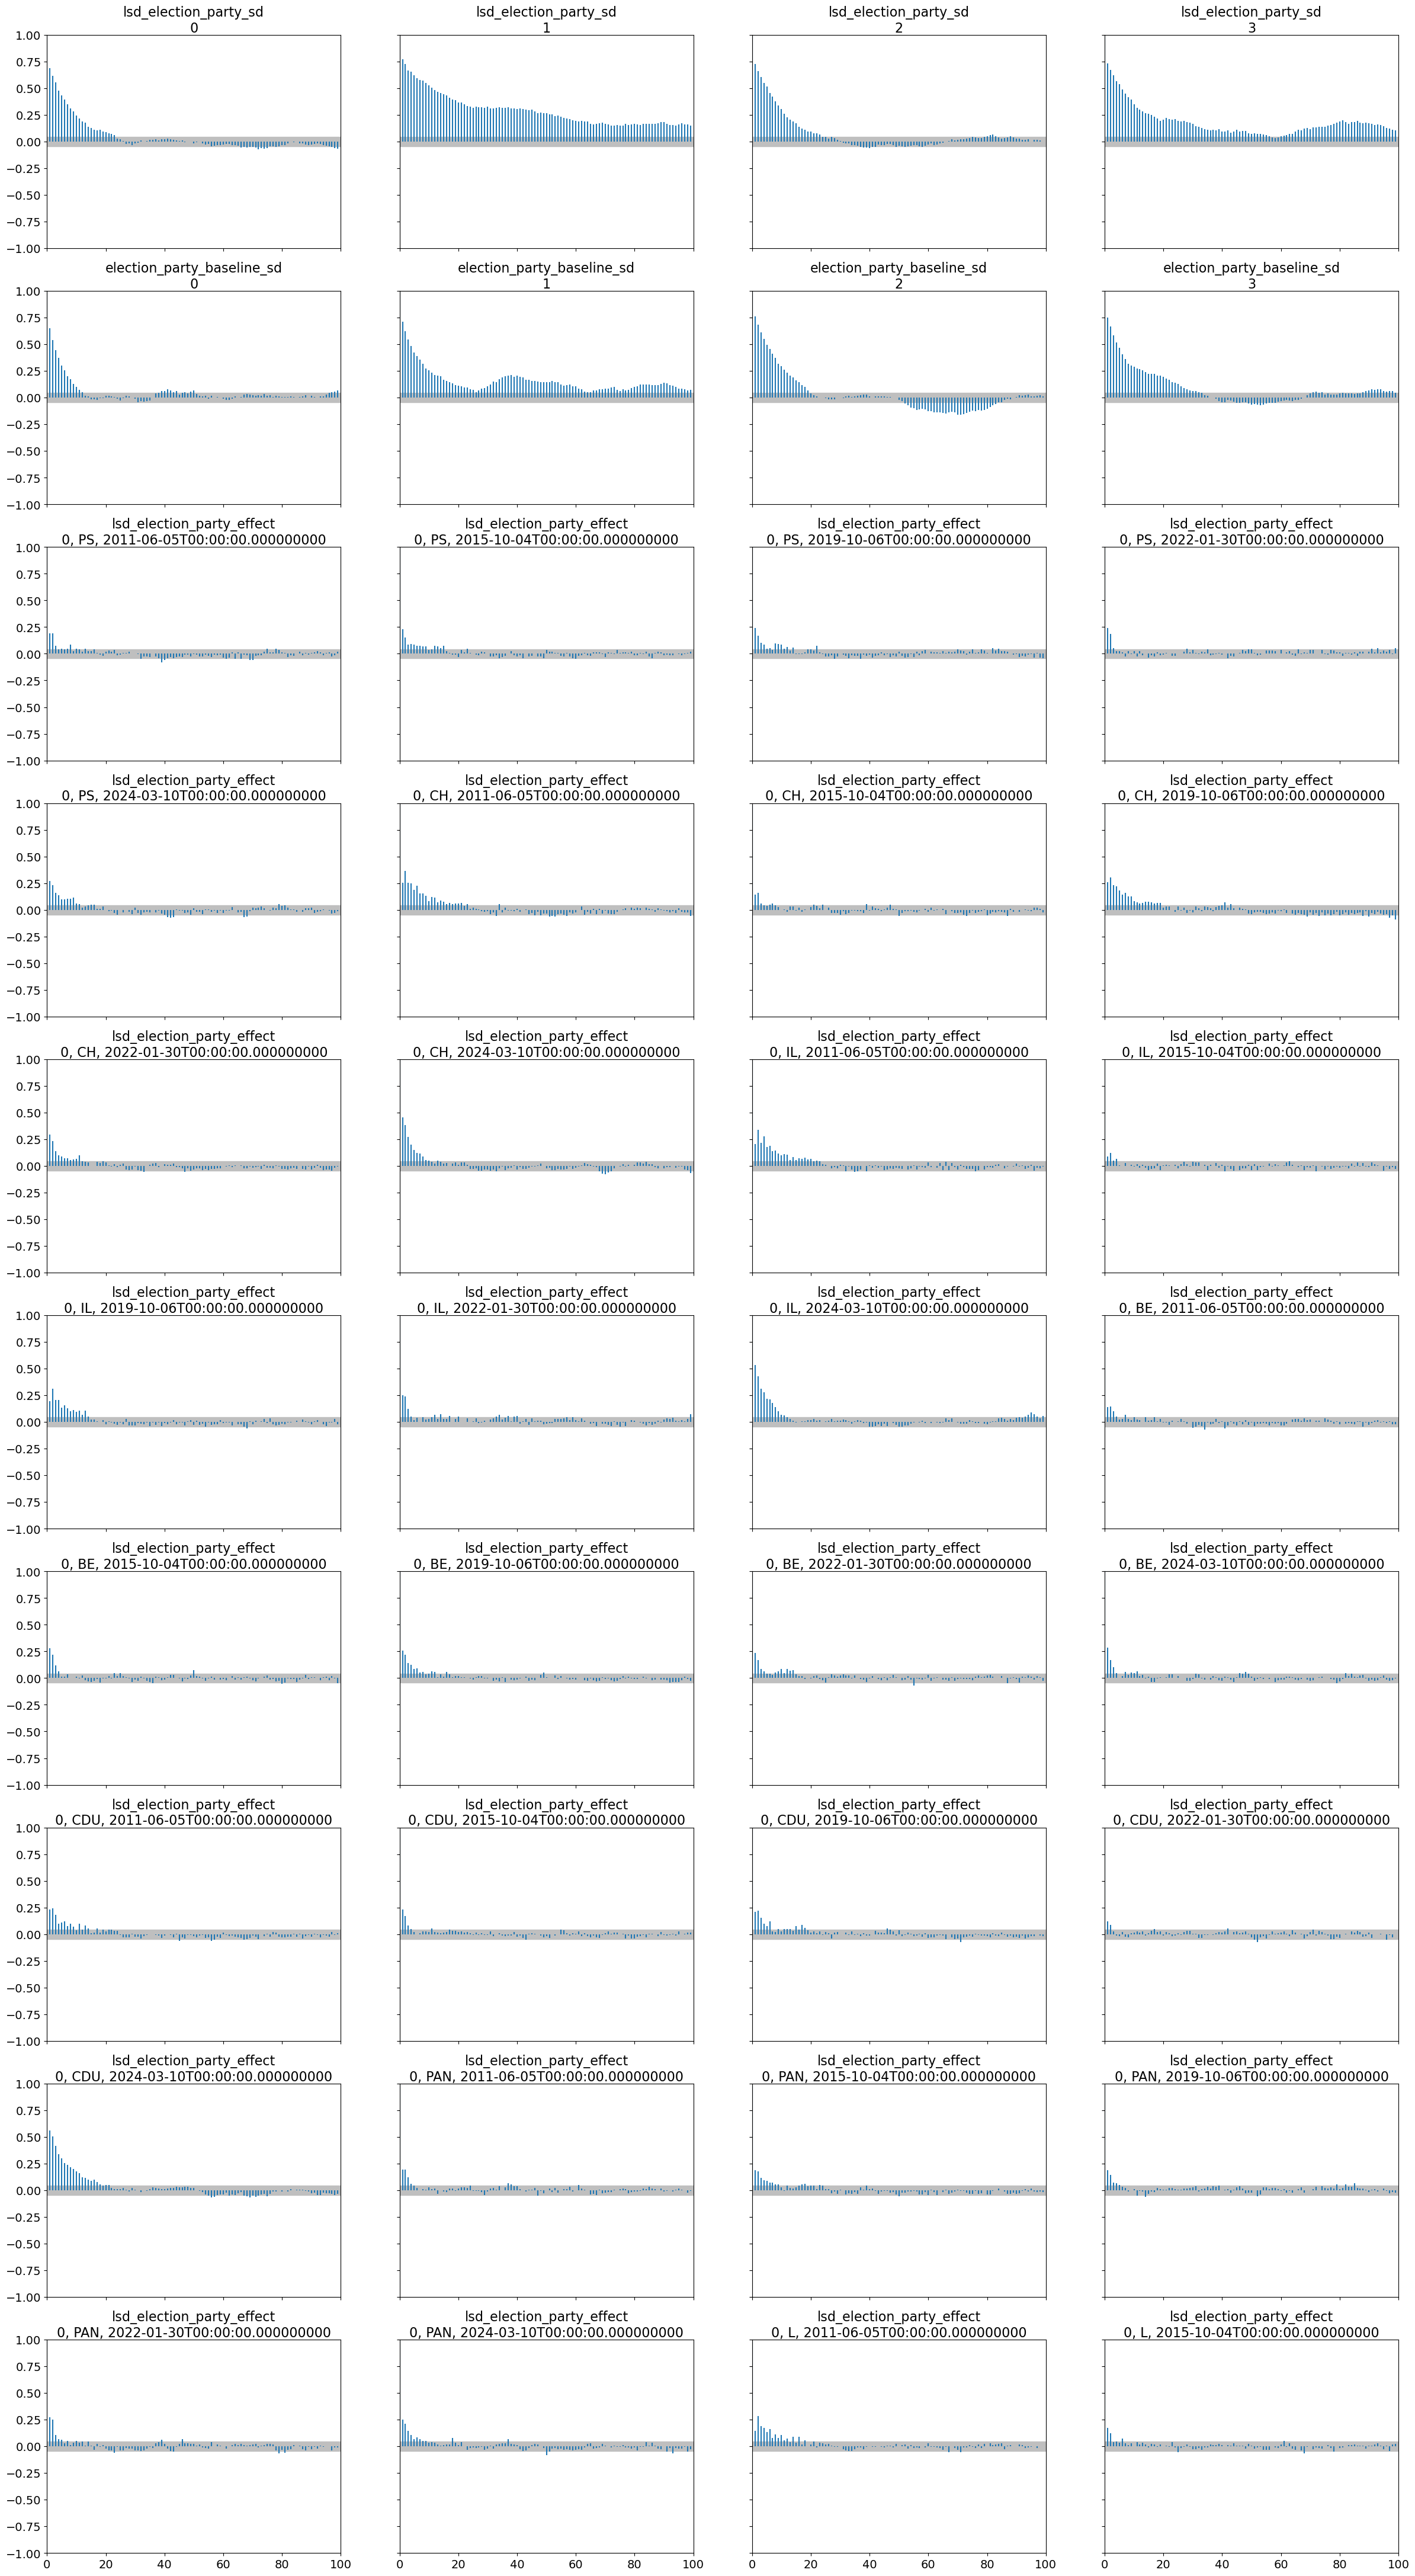

In [8]:
az.plot_autocorr(trace, var_names=problematic_vars)
plt.show()

/Users/bernardo.caldas/miniforge3/envs/bayes3/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (162) in plot_posterior, generating only 40 plots
  warnings.warn(


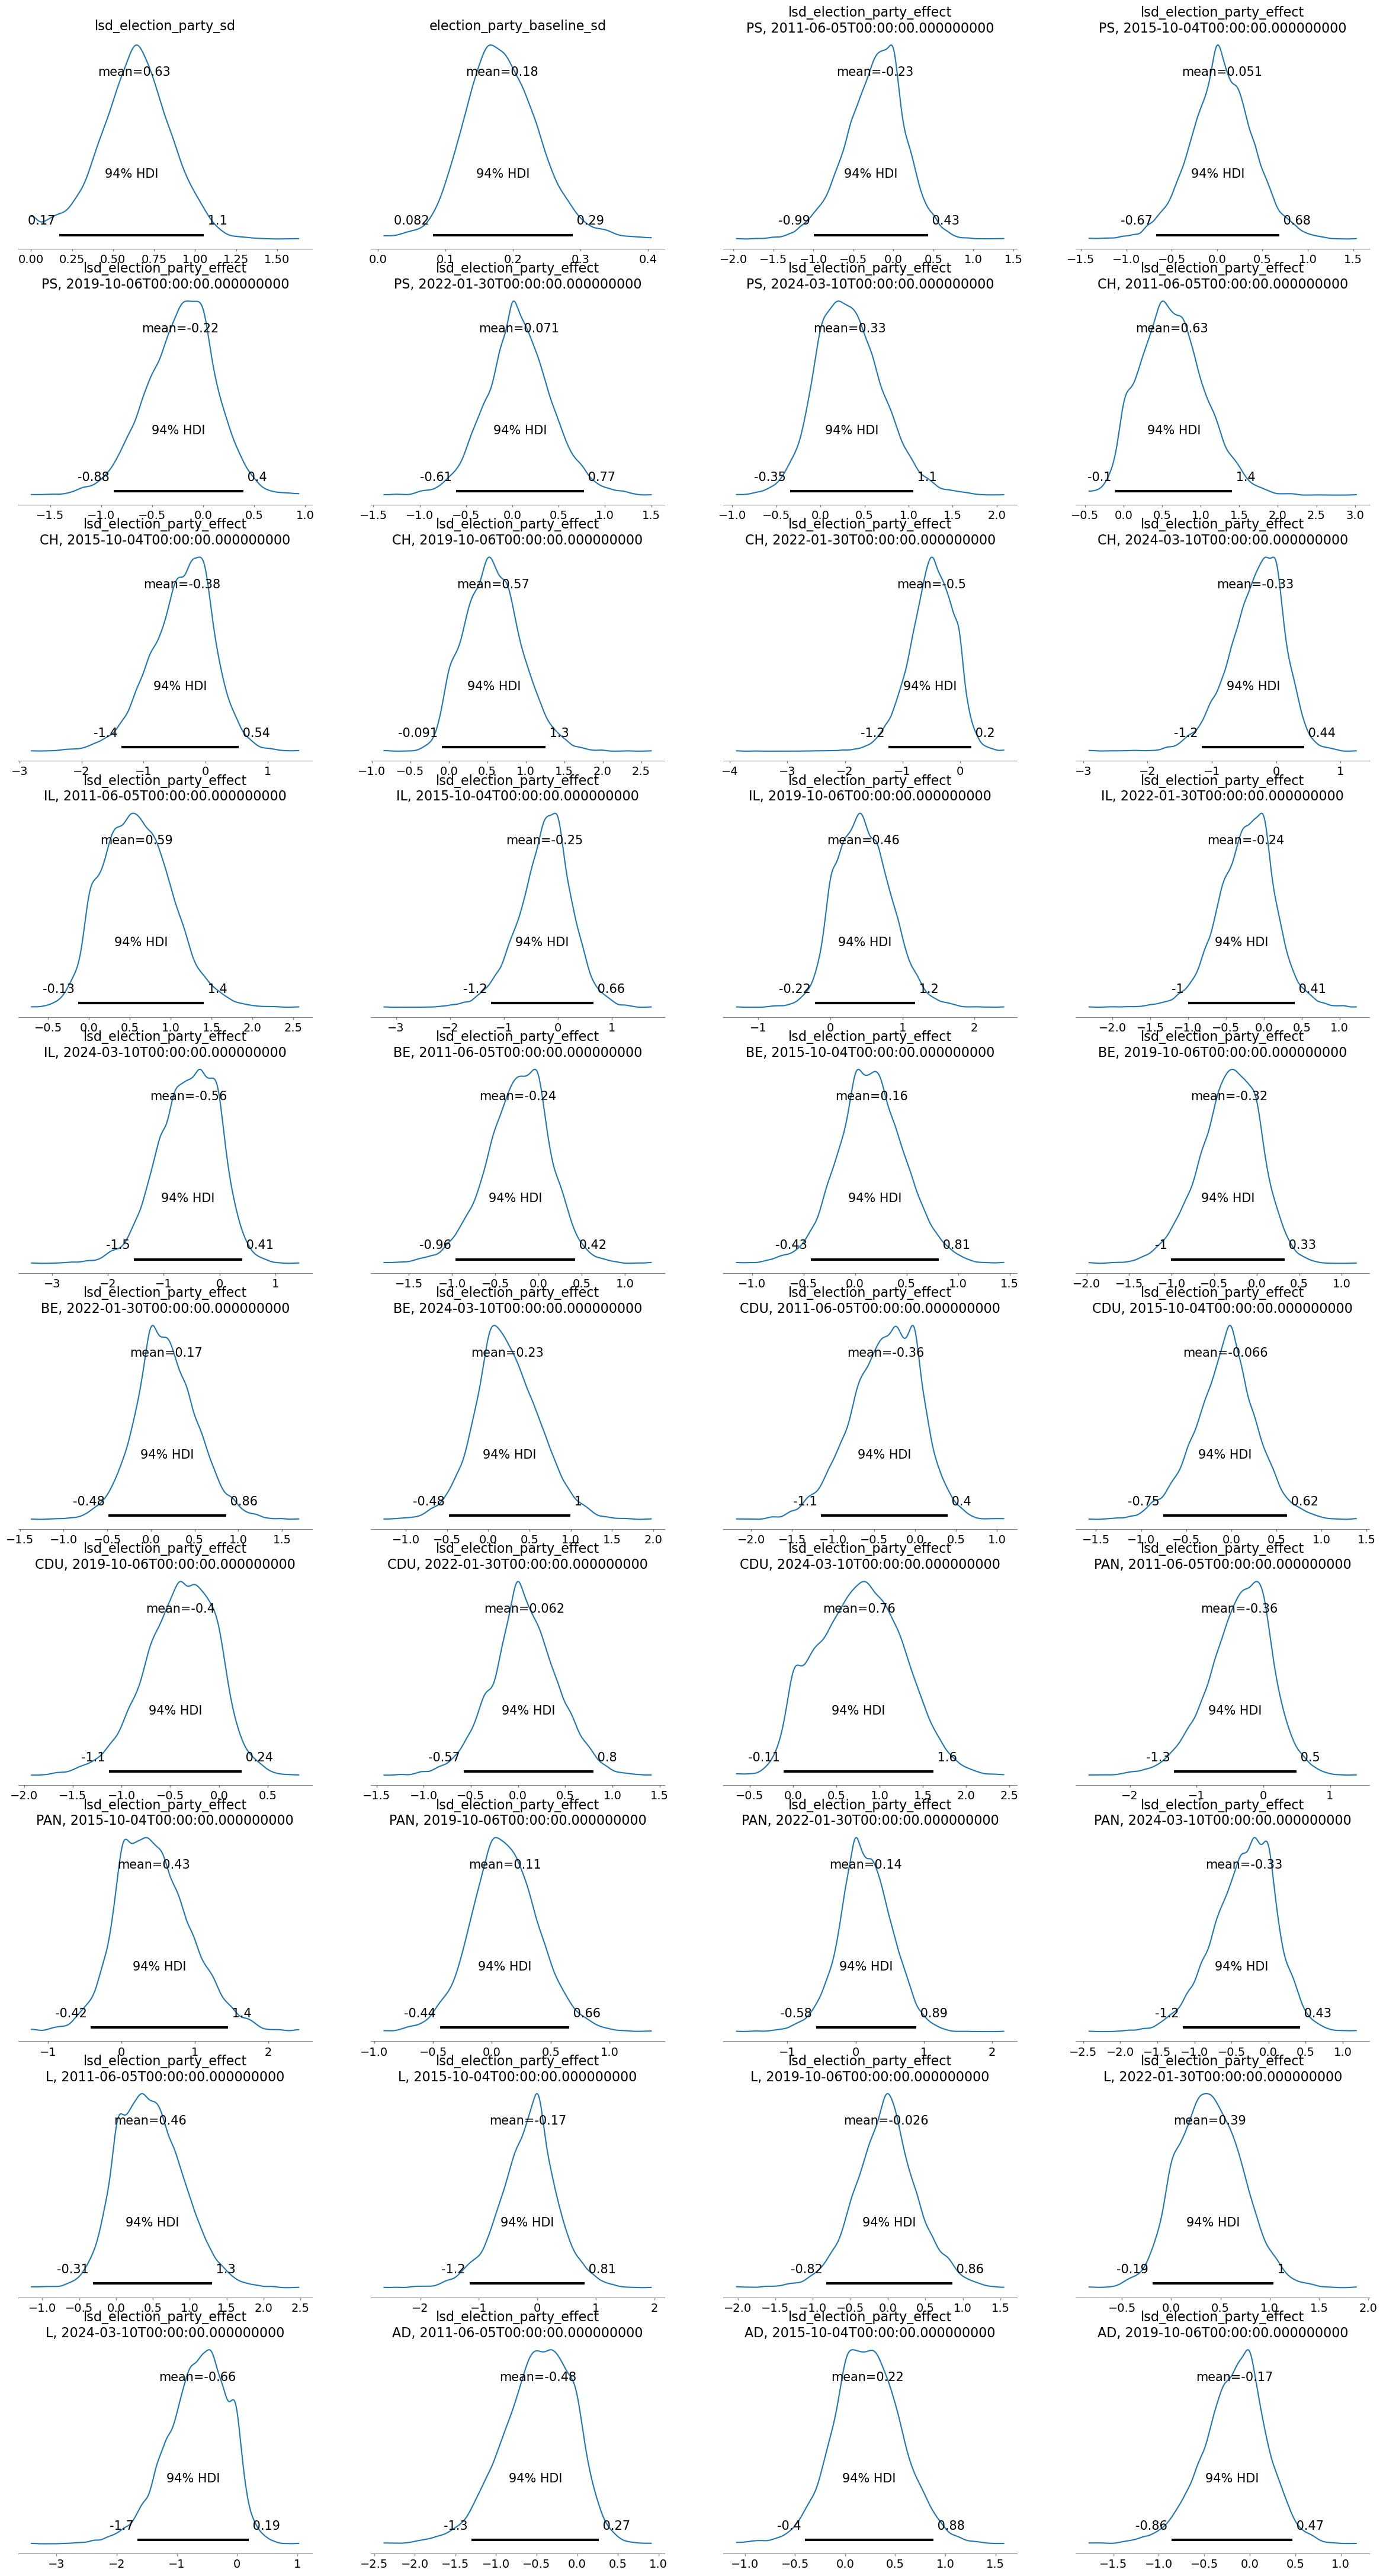

In [9]:
az.plot_posterior(trace, var_names=problematic_vars)
plt.show()